In [1]:
import random,csv,datetime,json
import matplotlib.pyplot as plt

In [2]:
def load_data(localFileName):
    with open(localFileName, mode='r') as infile:
        reader = csv.reader(infile)
        lookup = {row[0]: row[1].split(';') for row in reader if row}
    return lookup
def build_rules(items):
    rulesAdded = {}
    for state, adjacent in items.items():
        for adjacentState in adjacent:
            if adjacentState == '':
                continue
            rule = Rule(state, adjacentState)
            if rule in rulesAdded:
                rulesAdded[rule] += 1
            else:
                rulesAdded[rule] = 1
    for k, v in rulesAdded.items():
        if v != 2:
            print("rule {0} is not bidirectional".format(k))
    return rulesAdded.keys()

In [3]:
class Rule:
    def __init__(self, node, adjacent):
        if node < adjacent:
            node, adjacent = adjacent, node
        self.Node = node
        self.Adjacent = adjacent

    def __eq__(self, other):
        return self.Node == other.Node and self.Adjacent == other.Adjacent

    def __hash__(self):
        return hash(self.Node) * 397 ^ hash(self.Adjacent)

    def __str__(self):
        return self.Node + " -> " + self.Adjacent

    def IsValid(self, genes, nodeIndexLookup):
        index = nodeIndexLookup[self.Node]
        adjacentNodeIndex = nodeIndexLookup[self.Adjacent]
        return genes[index] != genes[adjacentNodeIndex]

In [4]:
class Chromosome:
    def __init__(self, genes, fitness):
        self.Genes = genes
        self.Fitness = fitness
        
def mutate(parent,geneSet,size):
    childGenes = parent.Genes[:]
    index = random.randrange(0, len(parent.Genes))
    newGene, alternate = random.sample(geneSet, 2)
    childGenes[index] = alternate if newGene == childGenes[index] else newGene
    fitness = get_fitness(childGenes,rules,size)
    return Chromosome(childGenes, fitness)

In [5]:
def display(candidate, startTime):
    timeDiff = datetime.datetime.now() - startTime
    print("{0}\t{1}\t{2}".format(
        ''.join(map(str, candidate.Genes)),
            candidate.Fitness,
            str(timeDiff)))

In [6]:
def get_fitness(genes, rules, stateIndexLookup):
    rulesThatPass = sum(1 for rule in rules if rule.IsValid(genes, stateIndexLookup))
    return rulesThatPass

In [7]:
states = load_data("./adjacent_states.csv")
rules = build_rules(states)
optimalValue = len(rules)
stateIndexLookup = {key: index
        for index, key in enumerate(sorted(states))}
colors = ["Orange", "Yellow", "Green", "Red"]
colorLookup = {color[0]: color for color in colors}
geneset = list(colorLookup.keys())

In [35]:
def get_best():
    random.seed()
    startTime = datetime.datetime.now()
    x = [random.choice(geneset) for i in range(len(stateIndexLookup))]
    bestParent = Chromosome(x,get_fitness(x,rules,stateIndexLookup))
    if bestParent.Fitness >= optimalValue:
        return bestParent
    num = 0
    while True:
        num +=1
        child = mutate(bestParent,geneset,stateIndexLookup)
        if bestParent.Fitness > child.Fitness:
            continue
        else:
            display(child,startTime)
            if child.Fitness  >= optimalValue:
                return (child,num)
            bestParent = child

In [36]:
b = get_best()

ROOYOGOORYRGYROOGGGGROOOGYYRGYRRORGOOYROOGOROGGROGG	74	0:00:00
ROOYOGOORYRGYROOGGGGROOOGYYRGYRRORGOOYROOROROGGROGG	76	0:00:00
RORYOGOORYRGYROOGGGGROOOGYYRGYRRORGOOYROOROROGGROGG	77	0:00:00
RORYOGOORYRGYROOGGGGGOOOGYYRGYRRORGOOYROOROROGGROGG	77	0:00:00
RORYOGOORYRGYROOGGGGGOOOGYYRGYRRORGGOYROOROROGGROGG	77	0:00:00.001013
RORYOGOORYRGYROOGGGGGOOORYYRGYRRORGGOYROOROROGGROGG	78	0:00:00.001013
RORYOGOORYRGYROOGGGGROOORYYRGYRRORGGOYROOROROGGROGG	78	0:00:00.001013
RORYOGOORYRGYROOGGGGROOORYYRGYRRORGGOYROOROROGGRORG	79	0:00:00.001013
RORYOGOORYRGYROOGGGGROOORYYRGYRRORGGOYYOOROROGGRORG	83	0:00:00.001013
RORYOGOORYRGYROOGGGGROOORYYRGYRRORGGOYYROROROGGRORG	84	0:00:00.001013
RORYOGOORYRGYROOGGGGROOORYYRGYRRORGYOYYROROROGGRORG	84	0:00:00.001996
RORYOGOORYYGYROOGGGGROOORYYRGYRRORGYOYYROROROGGRORG	84	0:00:00.001996
RORYOGOORYYGYROOGGGGROORRYYRGYRRORGYOYYROROROGGRORG	84	0:00:00.001996
RORYOYOORYYGYROOGGGGROORRYYRGYRRORGYOYYROROROGGRORG	85	0:00:00.002991
YORYOYOORYYGYROOGGGGROORRYYRGYRRORGYOYYROROROGGR

In [37]:
b[1]

1396

In [38]:
n = sorted(list(states.keys()))
clm = {}
for i in range(len(n)):
    clm[n[i]] = colorLookup[b[0].Genes[i]]

In [39]:
us = json.load(open("./states.json","r"))

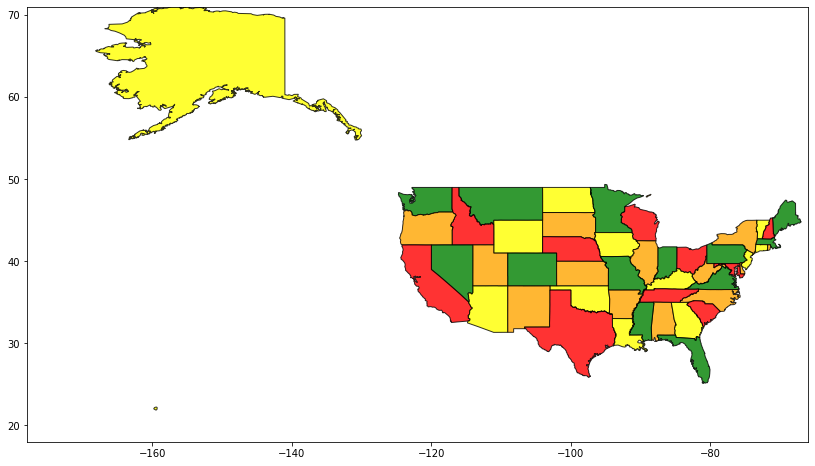

In [40]:
fig = plt.figure(figsize=(14,8)) 
ax = plt.subplot()
for c in us:
    js = json.loads(us[c])
    poly = plt.Polygon(js["rings"][0],ec = '#000000',
                           fc=clm[c], alpha = 0.8)
    ax.add_patch(poly)
       
ax.set_xlim(-178,-66)
ax.set_ylim(18,71)
plt.show()